In [5]:
# Import Dependencies
import gradio as gr
import pandas as pd
import numpy as np
from joblib import load
import warnings

In [6]:
warnings.simplefilter("ignore")

In [7]:
# Function to make Inference
def predict_disease_from_symptom(symptom_list):
    symptoms = {'itching': 0, 'skin_rash': 0, 'nodal_skin_eruptions': 0, 'continuous_sneezing': 0,
                'shivering': 0, 'chills': 0, 'joint_pain': 0, 'stomach_pain': 0, 'acidity': 0, 'ulcers_on_tongue': 0,
                'muscle_wasting': 0, 'vomiting': 0, 'burning_micturition': 0, 'spotting_ urination': 0, 'fatigue': 0,
                'weight_gain': 0, 'anxiety': 0, 'cold_hands_and_feets': 0, 'mood_swings': 0, 'weight_loss': 0,
                'restlessness': 0, 'lethargy': 0, 'patches_in_throat': 0, 'irregular_sugar_level': 0, 'cough': 0,
                'high_fever': 0, 'sunken_eyes': 0, 'breathlessness': 0, 'sweating': 0, 'dehydration': 0,
                'indigestion': 0, 'headache': 0, 'yellowish_skin': 0, 'dark_urine': 0, 'nausea': 0, 'loss_of_appetite': 0,
                'pain_behind_the_eyes': 0, 'back_pain': 0, 'constipation': 0, 'abdominal_pain': 0, 'diarrhoea': 0, 'mild_fever': 0,
                'yellow_urine': 0, 'yellowing_of_eyes': 0, 'acute_liver_failure': 0, 'fluid_overload': 0, 'swelling_of_stomach': 0,
                'swelled_lymph_nodes': 0, 'malaise': 0, 'blurred_and_distorted_vision': 0, 'phlegm': 0, 'throat_irritation': 0,
                'redness_of_eyes': 0, 'sinus_pressure': 0, 'runny_nose': 0, 'congestion': 0, 'chest_pain': 0, 'weakness_in_limbs': 0,
                'fast_heart_rate': 0, 'pain_during_bowel_movements': 0, 'pain_in_anal_region': 0, 'bloody_stool': 0,
                'irritation_in_anus': 0, 'neck_pain': 0, 'dizziness': 0, 'cramps': 0, 'bruising': 0, 'obesity': 0, 'swollen_legs': 0,
                'swollen_blood_vessels': 0, 'puffy_face_and_eyes': 0, 'enlarged_thyroid': 0, 'brittle_nails': 0, 'swollen_extremeties': 0,
                'excessive_hunger': 0, 'extra_marital_contacts': 0, 'drying_and_tingling_lips': 0, 'slurred_speech': 0,
                'knee_pain': 0, 'hip_joint_pain': 0, 'muscle_weakness': 0, 'stiff_neck': 0, 'swelling_joints': 0, 'movement_stiffness': 0,
                'spinning_movements': 0, 'loss_of_balance': 0, 'unsteadiness': 0, 'weakness_of_one_body_side': 0, 'loss_of_smell': 0,
                'bladder_discomfort': 0, 'foul_smell_of urine': 0, 'continuous_feel_of_urine': 0, 'passage_of_gases': 0, 'internal_itching': 0,
                'toxic_look_(typhos)': 0, 'depression': 0, 'irritability': 0, 'muscle_pain': 0, 'altered_sensorium': 0,
                'red_spots_over_body': 0, 'belly_pain': 0, 'abnormal_menstruation': 0, 'dischromic _patches': 0, 'watering_from_eyes': 0,
                'increased_appetite': 0, 'polyuria': 0, 'family_history': 0, 'mucoid_sputum': 0, 'rusty_sputum': 0, 'lack_of_concentration': 0,
                'visual_disturbances': 0, 'receiving_blood_transfusion': 0, 'receiving_unsterile_injections': 0, 'coma': 0,
                'stomach_bleeding': 0, 'distention_of_abdomen': 0, 'history_of_alcohol_consumption': 0, 'fluid_overload.1': 0,
                'blood_in_sputum': 0, 'prominent_veins_on_calf': 0, 'palpitations': 0, 'painful_walking': 0, 'pus_filled_pimples': 0,
                'blackheads': 0, 'scurring': 0, 'skin_peeling': 0, 'silver_like_dusting': 0, 'small_dents_in_nails': 0, 'inflammatory_nails': 0,
                'blister': 0, 'red_sore_around_nose': 0, 'yellow_crust_ooze': 0}
    
    # setting input values to 1
    for i in symptom_list:
        symptoms[i] = 1
    
    #creating a dataframe for model input
    df = pd.DataFrame(symptoms,index=[0])
    
    #loading model
    model = load("knn_model.joblib")
    result = model.predict(df)
    
    # cleaning to save the memory as we made it runs online on gradio server
    del df
    
    return f"{result[0]}"

In [8]:
iface = gr.Interface(predict_disease_from_symptom,[gr.inputs.CheckboxGroup(['itching', 'skin_rash', 'nodal_skin_eruptions', 
                                   'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue',
                                  'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss',
                                  'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration',
                                  'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
                                  'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation',
                                  'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool',
                                  'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties',
                                  'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints', 'movement_stiffness',
                                  'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching',
                                  'toxic_look_(typhos)', 'depression', 'irritability', 'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes',
                                  'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma',
                                  'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples',
                                  'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'yellow_crust_ooze']),
    ],
    "text",flagging_options=["Correct Output","Incorrect Output"],theme=gr.themes.Glass(),
    description="Select a symptom from the list and click submit to get predicted Disease as the Output. \
    [ NOTE: This app is meant for demo purposes only. Please consult a Doctor if you have any symptoms. ]"
)

iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://aac445ffbc2088b82a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


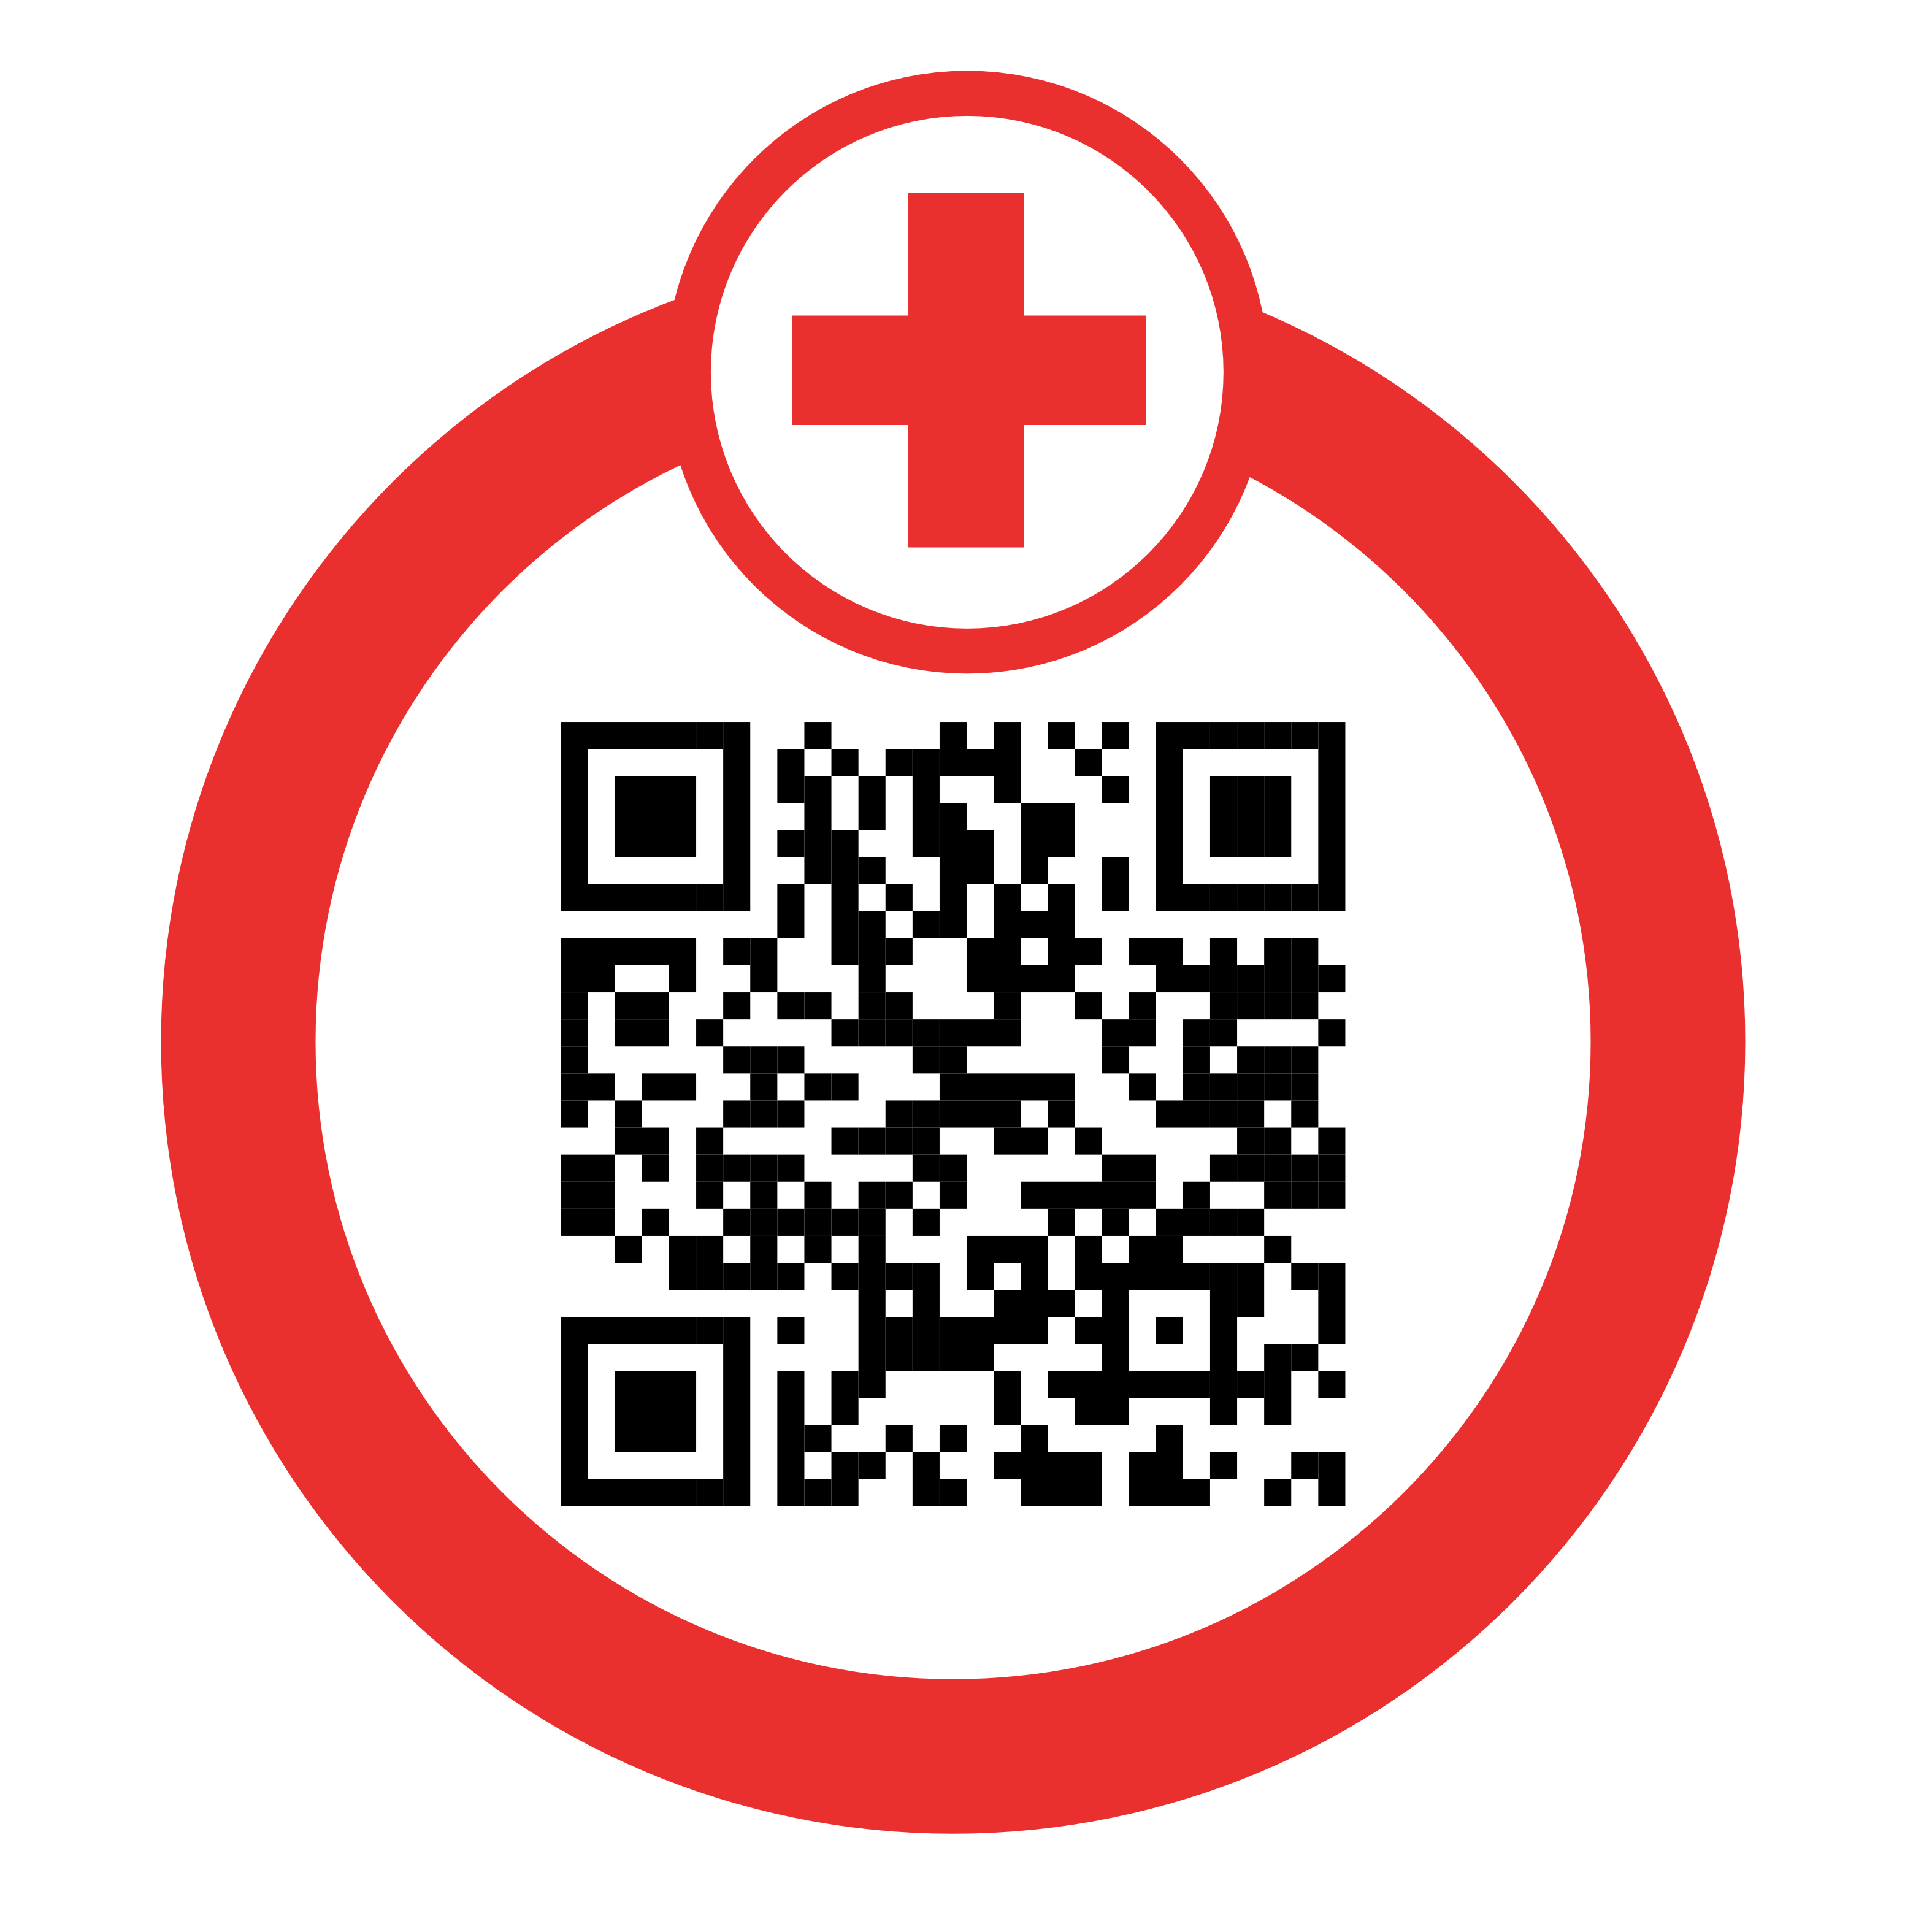